<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Examples.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Examples: Statistics – sample vs population metrics
© ExploreAI Academy

In this notebook, we'll explore the concepts of sample and population mean and variance, delve into the central limit theorem, and examine the principles of confidence intervals.



## Learning objectives

By the end of this notebook, you should be able to:
- Differentiate between sample and population metrics.
- Understand where the central limit theorem is utilised.
- Describe the function and measurement of confidence intervals.

## Examples

### Sample vs population metrics

In statistics, a **population** is the entire set of items or individuals that one is  interested in studying. Metrics calculated on this entire set give us the 'population metrics'.

A **sample**, on the other hand, is a subset of the population, selected for analysis. Metrics calculated on this subset are known as 'sample metrics'.

Understanding the difference between these two is crucial for correct data analysis, as the methods for calculating statistics can differ between a sample and a population.


In [1]:
# Example: Calculate the population and sample means.
import pandas as pd
import numpy as np

np.random.seed(0)  # for reproducibility
species_counts = np.random.randint(100, 300, size=100)  # random counts between 100 and 300 for 100 different areas
areas = ['Area' + str(i) for i in range(1, 101)]
data = {'Area': areas, 'Species_Count': species_counts}
df = pd.DataFrame(data)

# Population mean
population_mean = df['Species_Count'].mean()

# Sample mean (taking the first three areas as a sample)
sample = df.head(3)
sample_mean = sample['Species_Count'].mean()

print("Population Mean:", population_mean)
print("Sample Mean:", sample_mean)


Population Mean: 203.63
Sample Mean: 212.0


The sample may or may not be representative of the entire population, depending on how it was chosen.

### Mean and variance

**Mean** refers to the average value of the dataset while **variance** measures how spread out the numbers in the dataset are from the mean.

In a **population**, we divide by `N` (the number of values in the dataset), and in a **sample**, we divide by `n-1` (to correct for bias in estimation).


In [2]:
# Example: Calculating mean and variance for both population and sample.
# Population mean
population_mean = df['Species_Count'].mean()

# Sample mean
sample_mean = sample['Species_Count'].mean()

# Population variance
population_variance = df['Species_Count'].var(ddof=0)

# Sample variance
sample_variance = sample['Species_Count'].var(ddof=1)

print("Population Mean:", population_mean)
print("Sample Mean:", sample_mean)
print("Population Variance:", population_variance)
print("Sample Variance:", sample_variance)


Population Mean: 203.63
Sample Mean: 212.0
Population Variance: 3319.393099999999
Sample Variance: 3925.0


The sample variance, adjusted by `ddof=1`, is slightly higher as it corrects for the fact that a sample gives us less information than the entire population.

### Central limit theorem (CLT)

The CLT is a fundamental principle in statistics that explains why many distributions tend to be close to the normal distribution, especially when dealing with averages. This holds true even if the underlying distribution of the data is not normally distributed.

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
    <img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/normal-distribution.png"  style="width:30%";/>
    <br>
    <br>
    <em>Figure 1: Normal distribution.</em>
</div>

The CLT states that as the **size of the sample increases**, the distribution of the sample means will increasingly approximate a normal distribution (bell curve), regardless of the population's distribution. This approximation improves with larger sample sizes. Typically, a sample size of 30 or more is considered sufficient for the CLT to hold

Key aspects of CLT include:

* **Independence**: Each random variable should be independent of each other.
* **Identically distributed**: Each random variable should come from the same probability distribution.
* **Large sample size**: The theorem holds better as the sample size increases. While there's no fixed number that defines a "large" sample, a common rule of thumb is a sample size of 30 or more.

Statistically, the CLT theorem:

* Allows for making **predictions** about population parameters using sample statistics, which is crucial in fields where collecting data for the entire population is impractical or impossible.
* Is the **foundation for many hypothesis tests** and confidence interval calculations, making it a key concept in inferential statistics.
* Justifies using the normal distribution as an **approximation** for the distribution of various statistics, simplifying analysis.

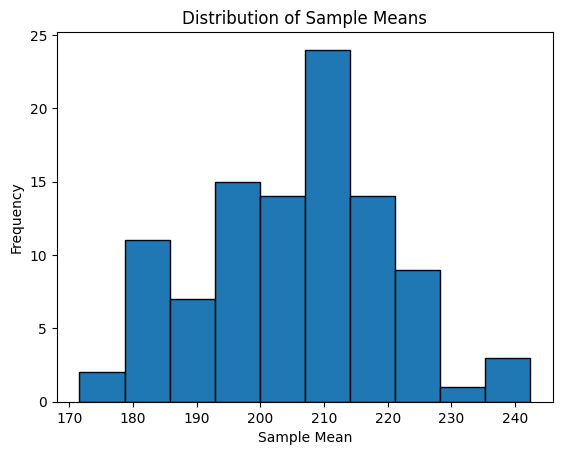

In [3]:
import matplotlib.pyplot as plt

# Taking multiple samples and calculating their means
# That is, take a random sample of 15 values. Repeat this process 100 times.
sample_means = [np.mean(df['Species_Count'].sample(15)) for _ in range(100)]

# Plotting the distribution of sample means
plt.hist(sample_means, bins=10, edgecolor='black')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.title('Distribution of Sample Means')
plt.show()

The **histogram** plotted from the sample means provides a **visual representation of how these means are distributed**. Even though our original data might not be normally distributed, the distribution of these sample means tends to be normal.

The bell shape of the histogram, even with a relatively small number of samples, begins to resemble a normal distribution. This pattern becomes more pronounced with larger sample sizes.

### Confidence intervals

A confidence interval (CI) is a statistical tool that **estimates the range of values** within which a population parameter, such as the mean or proportion, is likely to lie. The CI has two bounds: a lower and an upper limit, and it is constructed around a sample statistic.

The confidence level (commonly set at 95%) indicates the degree of certainty in the interval estimate. In essence, a 95% confidence interval means that if we were to take 100 different samples and compute a CI for each sample, we would expect about 95 of those intervals to contain the true population parameter.

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
    <img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Confidence_interval.png"  style="width:50%";/>
    <br>
    <br>
    <em>Figure 2: Confidence interval.</em>
</div>

Confidence intervals are foundational in inferential statistics, providing a measure of precision for our estimates. Unlike a point estimate, which gives a single value for a parameter, a confidence interval offers a range of plausible values, thereby incorporating the uncertainty inherent in sampling.

Confidence intervals are important because they:
* Help in **assessing** whether a **statistical hypothesis test is significant**. For instance, if a 95% CI for a mean difference between two groups does not include zero, it suggests a statistically significant difference at the 0.05 level.
* Provide valuable information for **decision-making** in business, healthcare, and policy-making by quantifying the uncertainty in estimates.
* Can be used to **compare** the effect, sizes, or differences between groups in a visual and intuitive way.

Let's calculate a 95% confidence interval for the sample mean from our dataset.

In [6]:
import scipy.stats as stats

# Sample data: Number of a particular species in first three areas
sample_data = sample['Species_Count']  # Sample values

# Calculate mean and standard error of the mean (SEM)
mean = np.mean(sample_data)
standard_error = stats.sem(sample_data)

# Degrees of freedom
degrees_freedom = len(sample_data) - 1

# Calculate 95% confidence interval for sample mean
confidence_level = 0.95
confidence_interval = stats.t.interval(confidence_level, degrees_freedom, mean, standard_error)

print(f"95% Confidence Interval: {confidence_interval}")

95% Confidence Interval: (56.36921843561973, 367.6307815643803)


In the code snippet above:

* We use the `stats.t.interval` function from the `scipy.stats` module to calculate the confidence interval.
* The `confidence_level` is set to `0.95`, indicating a 95% CI.
* `degrees_freedom` is calculated as the sample size minus one.
* `mean` and `standard_error` are computed from the sample data.
* The result, `confidence_interval`, gives us the lower and upper bounds of the interval.


The calculated confidence interval provides a range of values. We are **95% confident** that the true population mean of the species count falls within this interval. This range reflects the uncertainty of estimating the population mean from a sample. The wider the interval, the more uncertainty there is in the estimate.

 Confidence intervals are more informative than just point estimates because they give a range of plausible values for the parameter, highlighting the precision of the estimate and the variability of the data.

## Summary

In this notebook, we delved into vital statistical concepts such as understanding the distinction between population and sample metrics, calculating mean and variance, exploring the central limit theorem (CLT), and comprehending confidence intervals (CI). These fundamental principles are crucial for effective data analysis and statistical inference.

#  

<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/ExploreAI_logos/EAI_Blue_Dark.png"  style="width:200px";/>
</div>